In [1]:
from numpy import *

def loadDataSet(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = []
        for item in curLine:
            fltLine.append(float(item))
        dataMat.append(fltLine)
    return dataMat

In [2]:
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

In [3]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

In [4]:
datMat = mat(loadDataSet('testSet.txt'))
datMat

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926],
        [ 2.336445,  2.875106],
        [-1.786345,  2.554248],
        [ 2.190101, -1.90602 ],
        [-3.403367, -2.778288],
        [ 1.778124,  3.880832],
        [-1.688346,  2.230267],
        [ 2.592976, -2.054368],
        [-4.007257, -3.207066],
        [ 2.257734,  3.387564],
        [-2.679011,  0.785119],
        [ 0.939512, -4.023563],
        

In [5]:
randCent(datMat, 2)

matrix([[ 3.17754972,  0.80006688],
        [-0.31201259,  2.95794052]])

In [6]:
distEclud(datMat[0], datMat[1])

5.184632816681332

In [7]:
def kMeans(dataSet, k, distMeas = distEclud, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist, minIndex = inf, -1
            for j in range(k):
                distJI = distMeas(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    minDist, minIndex = distJI, j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist * 2
        #print(centroids)
        for cent in range(k):
            #                   print(nonzero(clusterAssment[:,0].A == cent))
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]
            centroids[cent,:] = mean(ptsInClust, axis = 0)
    return centroids, clusterAssment

In [8]:
myCentroids, clustAssing = kMeans(datMat, 4)

In [9]:
myCentroids

matrix([[-2.46154315,  2.78737555],
        [-3.53973889, -2.89384326],
        [ 2.6265299 ,  3.10868015],
        [ 2.65077367, -2.79019029]])

In [18]:
#Bisecting k-means
def biKmeans(dataSet, k, distMeas = distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroid0 = mean(dataSet, axis = 0).tolist()[0]
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j,:]) ** 2
    while len(centList) < k:
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A == i)[0],:]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A != i)[0], 1])
            print('sseSplit, and notSplit: ', sseSplit, sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        # 因为二分均值，所以结果簇编号只能是0或1，修改结果簇编号为：原簇号和新增簇号
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0], 0] = len(centList)
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0], 0] = bestCentToSplit
        print('the bestCentToSplit is: ', bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        # 更新簇列表centlist和样本点分配簇结果矩阵clusterAssment
        # 更新质心列表
        # 更新原质心list中的第i个质心为使用二分kMeans后bestNewCents的第一个质心
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]
        # 添加bestNewCents的第二个质心
        centList.append(bestNewCents[1, :].tolist()[0])
        # 重新分配最好簇下的数据(质心)以及SSE
        clusterAssment[nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0], :] = bestClustAss
    return mat(centList), clusterAssment    #3个中心点，全部的点及其聚类情况

In [19]:
dataMat3 = mat(loadDataSet('testSet2.txt'))
centList, myNewAssments = biKmeans(dataMat3, 3)

[[-0.15772275000000002, 1.2253301166666664]]
sseSplit, and notSplit:  289.6404344850007 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
sseSplit, and notSplit:  99.2374409254009 43.596367476846
sseSplit, and notSplit:  29.396286311612577 246.0440670081547
the bestCentToSplit is:  0
the len of bestClustAss is:  40


In [297]:
centList

matrix([[-0.45965615, -2.7782156 ],
        [ 2.93386365,  3.12782785],
        [-2.94737575,  3.3263781 ]])

In [298]:
myNewAssments

matrix([[1.        , 0.76278713],
        [2.        , 1.64950153],
        [0.        , 2.0217278 ],
        [1.        , 2.3199031 ],
        [2.        , 2.32702784],
        [0.        , 3.93531457],
        [1.        , 1.8300382 ],
        [2.        , 0.93833101],
        [0.        , 3.76196256],
        [1.        , 5.45557022],
        [2.        , 4.59595492],
        [0.        , 0.32042122],
        [1.        , 2.11609574],
        [2.        , 0.8194898 ],
        [0.        , 2.91021817],
        [1.        , 2.44650943],
        [2.        , 4.44354921],
        [0.        , 0.19766131],
        [1.        , 0.72788418],
        [2.        , 1.59918235],
        [0.        , 1.94091929],
        [1.        , 2.62637029],
        [2.        , 1.73283906],
        [0.        , 0.77145474],
        [1.        , 3.46658073],
        [2.        , 4.54064985],
        [0.        , 2.6856391 ],
        [1.        , 3.31557405],
        [2.        , 1.36654354],
        [0.   

In [1]:
def distSLC(vecA, vecB):
    a = sin(vecA[0, 1] * pi / 180) * sin(vecB[0, 1] * pi / 180)
    b = cos(vecA[0, 1] * pi / 180) * cos(vecB[0, 1] * pi / 180) * cos(pi * (vecB[0, 0] - vecA[0, 0]) / 180)
    return arccos(a + b) * 6371.0

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust = 5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas = distSLC)
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    axprops = dict(xticks = [], yticks = [])
    ax0 = fig.add_axes(rect, label = 'ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1 = fig.add_axes(rect, label = 'ax1', frameon = False)    #叠加图层时frameon必须设置成False，不然会覆盖下面的图层
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A == i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0],\
                    marker = markerStyle, s = 90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker = '+', s = 300)
    plt.show()

sseSplit, and notSplit:  775.8563518436342 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
sseSplit, and notSplit:  416.29170589521175 266.45260020877004
sseSplit, and notSplit:  230.1848841230717 509.4037516348643
the bestCentToSplit is:  0
the len of bestClustAss is:  39
sseSplit, and notSplit:  224.6050372855292 354.7746280124017
sseSplit, and notSplit:  230.1848841230717 416.29170589521175
sseSplit, and notSplit:  55.266658461010486 594.4222783003502
the bestCentToSplit is:  0
the len of bestClustAss is:  30
sseSplit, and notSplit:  11.983419776610189 517.1972630611151
sseSplit, and notSplit:  188.76265172758886 312.9270650891609
sseSplit, and notSplit:  56.71320431526944 491.05763749429923
sseSplit, and notSplit:  98.02030075178116 416.9570302492175
the bestCentToSplit is:  1
the len of bestClustAss is:  30


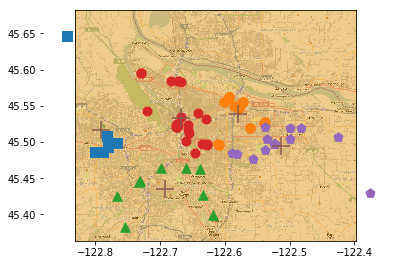

In [300]:
clusterClubs(5)